#!/usr/bin/env python
# coding: utf-8

# **심화도전2**
# ### **Breast cancer wisconsin 데이터를 이용한 <span style="color:darkgreen">AI분류</span> 문제**
# ---

# #### 암세포의 형태 데이터를 이용하여 암 진단 판정을 악성과 양성으로 분류하는 AI문제입니다. 
# #### AI코딩 단계에 따라 주어지는 문제를 읽고 답안을 작성하세요.
# #### ( Breast cancer wisconsin 데이터 : sklearn 내장 연습용 데이터셋 사용)
# 
#  - 데이터 : 분류(카테고리)
#  - 모델 : KNN(머신러닝 모델 비교 분석), DeepLearning
#  - 주요 전처리 : 분석 Column 추가, 표준화(standardization)
#  - 주요 학습 내용 : 이중 분류 모델 생성(binary 분류, input, output 처리, 손실함수 등), 머신러닝 모델 비교학습(리스트 활용)
# ---
# 
# **아래 측정값들을, 평균(mean), 표준오차(error), 제일 큰 값 3개의 평균(worst)으로 나타낸다. 예를 들어 radius는 mean radius, radius error, worst radius 3개 컬럼으로 나타난다.**<br>
# 
# - radius : 암세포의 반지름
# - texture : 질감
# - perimeter : 둘레
# - area : 면적
# - smoothness : 매끄러움
# - concavity : 오목함
# - concave points : 오목한 곳의 수
# - symmetry : 대칭성
# - fractal dimension : 프렉탈 차원
# - class : 라벨(y변수) 데이터로 세포의 양성/악성 여부를 binary로 표기한 데이터
#     * 0 : malignant : 악성
#     * 1 : benign : 양성
# 

# ---
# > **<span style="color:red">다음 문항을 풀기 전에 </span>아래 코드를 실행하시오.**<br>
# > **sklearn에서 제공하는 load_breast_cacncer에 대한 데이터를 불러올 예정입니다. <span style="color:darkgreen"></span>**<br>
# > ** 해당 형태로 불러온 데이터는 AIDU 환경변수와 상관없이 사용할수 있습니다.<br>
# > 분석할 feautre 데이터는 x 변수에, 라벨은 y변수에 저장 되게 됩니다.(사전 x,y 데이터 분리 실행)
# > y변수는 상기 서술된 컬럼 중 class 항목입니다.
# 
# 
# ---

In [1]:

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
x = cancer.data # 인풋으로 사용할 데이터
y = cancer.target # 아웃풋, target으로 사용할 데이터
col_names = cancer.feature_names # 인풋으로 사용할 데이터의 컬럼별 이름들
target_names = cancer.target_names # 아웃풋, target으로 사용할 데이터의 클래스 이름


# ### **Q1. pandas를 pd로 alias하여 사용할 수 있도록 불러오는 코드를 작성하고 실행하시기 바랍니다.**
# ---


In [2]:
import pandas as pd


# ### **Q2.Matplotlib의 pyplot을 plt로 alias하여 사용할 수 있도록 불러오는 코드를 작성하고 실행하시기 바랍니다.**
# ---


In [3]:

import matplotlib.pyplot as plt

# ### **Q3. 인풋데이터(x)와 인풋데이터 컬럼명(col_names)를 이용하여 인풋데이터의 dataframe을 제작하시기 바랍니다.**
# * **
# - 데이터 프레임의 변수 명은 bcc 로 한다.
# ---

In [6]:

bcc = pd.DataFrame(cancer.data, columns = col_names)
bcc

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400



# ### **Q4. 데이터를 트레이닝셋 / 테스트셋으로 분할하시기 바랍니다.**
# * **
# - bcc와, y를 이용한다. ( x를 사용해도 좋지만, 이후 문제를 위해 bcc를 이용한다.)
# - train : test = 8.5 : 1.5
# - y의 클래스가 골고루 분할되도록 stratify하게 분할한다.
# - 변수명 규칙은 다음과 같다.
#     * x_train, y_train
#     * x_test, y_test
# - random state, seed 등은 2021로 설정한다.
# ---

In [7]:

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15,  stratify = y, random_state=2021)


# ### **Q5. 트레이닝 데이터를 트레이닝셋 / 벨리데이션셋으로 분할하시기 바랍니다.**
# * **
# - x_train, y_train을 이용한다.
# - train : validation = 7 : 3
# - y_train의 클래스가 골고루 분할되도록 stratify하게 분할한다.
# - 변수명 규칙은 다음과 같다.
#     * x_train, y_train
#     * y_valid, y_valid
# - random state, seed 등은 2021로 설정한다.
# ---


In [8]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.255,  stratify = y_train, random_state=2021)
x_train.shape


(359, 30)


# ### **Q6. x_train, x_valid, x_test의 인덱스를 초기화 하시기 바랍니다.**
# * **
# - 현재 x들은 전부 dataframe이고, 원본 bcc의 인덱스를 그대로 가지고 있다.
# - 맨 첫번째 row부터 순서대로 인덱스를 갖도록 한다
# - 인덱스는 정수 인덱스이며, 0부터 시작한다.
# ---

In [9]:
bcc.reset_index()


,index,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400



# ### **Q7. x_train, x_valid, x_test의 모든 컬럼을 각각 표준화(standardization) 스케일링 하시기 바랍니다.**
# * **
# - **모든 전처리 규칙은 트레이닝셋으로 부터 선정한다.**
# - 스케일링한 x들은 각각 아래의 변수에 따로 선언해둔다.
#     * x_train_sc
#     * x_valid_sc
#     * x_test_sc
# ---

In [10]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)

scaler.fit(x_valid)
x_valid_sc = scaler.transform(x_valid)

scaler.fit(x_test)
x_test_sc = scaler.transform(x_test)


# ### **Q8. KNN 모델들을 학습시키시기 바랍니다.**
# * **
# - 트레이닝 셋 (x_train_sc, y_train)을 이용하여 학습시킨다.
# - KNN의 이웃수(k)를 2부터 15까지 늘려가며 총 14개의 모델을 학습시킨다.
# - 학습시킨 트리들은 리스트를 만들어 knns 변수에 담아둔다.
# - y를 예측할 경우, 이웃들의 거리값은 반영하지 않는다.(weights 파라미터는 uniform을 사용한다.)
# - 각 모델을 knns 라는 list에 순차적으로 저장하시기 바랍니ㅣ다.
# ---

In [11]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_param = range(2,16)
knns = []

for k in k_param:
    knn = KNeighborsClassifier(n_neighbors=k, weights = "uniform")
    knns.append(knn.fit(x_train_sc, y_train))


# ### **Q9. KNN 모델들의 성능을 리스트에 담아 accs에 선언하시기 바랍니다.**
# * **
# - k가 2인 knn모델부터 순서대로 평가하여 리스트에 담는다.
# - 벨리데이션 셋 위에서 성능을 평가한다. (x는 스케일링 된 값이어야 한다.)
# - 성능지표로는 accuracy를 사용한다.
# ---

In [12]:
accs=[]
for i in range(14):
    print(knns[i].score(x_valid_sc, y_valid))
    accs.append(knns[i].score(x_valid_sc, y_valid))


0.9435483870967742
0.967741935483871
0.967741935483871
0.9516129032258065
0.9596774193548387
0.9596774193548387
0.9596774193548387
0.967741935483871
0.9596774193548387
0.967741935483871
0.9596774193548387
0.967741935483871
0.967741935483871
0.9596774193548387


# ### **Q10. KNN모델들의 k(이웃수)에 따른 accuracy를 시각화 하고, 가장 성능이 좋은 k 값을 선택하시기 바랍니다.**
# * **
# - 위의 Q9에서 제작한 리스트 accs를 이용한다.
# - line plot 이나 scatter plot을 이용한다.
# - 동일 성능의 k가 여러개라면, 가장 작은 k를 선택한다.
# ---

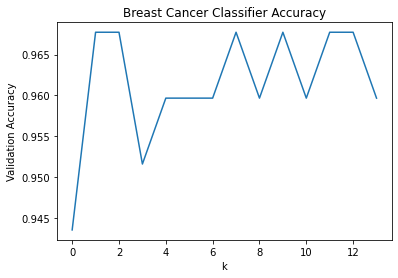

In [13]:
plt.plot(accs)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

a = accs.index(max(accs))
k = knns[a]

# ### **Q11. 선택된 KNN모델의 테스트셋 위에서의 accuracy를 출력하시기 바랍니다.**
# * **
# - 성능 확인 시 입력데이터는 스케일링 된 데이터인 x_test_sc를 사용해야 한다.
# ---

In [14]:

k.score(x_test_sc, y_test)



0.9651162790697675

# ### **Q12. 해당 모델의 classificaiton report를 출력하고, malignant의 precision 값을 출력하시오**
# ---
#   - 테스트셋 위의 성능 평가를 바탕으로 문제를 푼다.
#   - 성능 확인 시 입력데이터는 스케일링 된 데이터인 x_test_sc를 사용해야 한다.
# ---


In [15]:

y_test_sc = k.predict(x_test_sc)
from sklearn.metrics import classification_report

target_names = ['y_test','y_test_sc'] # target values

# Print classification report after a train/test split:
print(classification_report(y_test,y_test_sc, target_names=target_names))


              precision    recall  f1-score   support

      y_test       0.94      0.97      0.95        32
   y_test_sc       0.98      0.96      0.97        54

    accuracy                           0.97        86
   macro avg       0.96      0.97      0.96        86
weighted avg       0.97      0.97      0.97        86



In [16]:
from sklearn.metrics import precision_score
precision_score(y_test,y_test_sc, pos_label = 0)
#앞이 실제 뒤가 예측

0.9393939393939394

# ### **Q13. Q8에서 Q11 까지의 학습 과정을 scaling 되지 않은 원본데이터로 학습하여 별도의 모델을 만드시기 바랍니다.**
# * **
# - 해당 모델의 classificaiton report를 출력하고, malignant의 precision 값을 출력하시오
#     - 테스트셋 위의 성능 평가를 바탕으로 문제를 푼다.
#     - 성능 확인 시 입력데이터는 스케일링 하지 않은 데이터인 x_valid를 사용해야 한다.
# ---


In [17]:
y_valid_sc = k.predict(x_valid)
target_names = ['y_valid','y_valid_sc'] # target values
# Print classification report after a train/test split:
print(classification_report(y_valid,y_valid_sc, target_names=target_names))

precision_score(y_valid,y_valid_sc, pos_label = 0)


              precision    recall  f1-score   support

     y_valid       0.37      1.00      0.54        46
  y_valid_sc       0.00      0.00      0.00        78

    accuracy                           0.37       124
   macro avg       0.19      0.50      0.27       124
weighted avg       0.14      0.37      0.20       124



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.3709677419354839

# ### **Q14. 스케일링하지 않은 데이터의 예측 모델 성능과, 스케일링한 데이터의 예측모델 성능을 출력하여 비교하시기 바랍니다.**
# * **
# - 기존 만든 best_knn 모델의 score를 사용하여 성능을 출력할 것
# - 스케일링한 학습 모델은 데이터 : x_test_sc 활용
# - 스케일링하지 않은 모델은 데이터 x_test 활용
# ---

In [18]:
print(k.score(x_test_sc, y_test))
print(k.score(x_test, y_test))


0.9651162790697675
0.37209302325581395


In [19]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping


# ### **Q16. 아래 조건에 맞추어 뉴럴네트워크 모델을 학습시키시기 바랍니다**
# * **
# - Tensorflow framework를 사용한다.
# - 히든레이어는 아래와 같은 규칙에 맞추어 구성합니다.
#     * 3개 이상의 fully connected layer를 사용할 것
#     * Drop out과 batchnormalization을 각각 한번 이상 사용한다.
# - Early stopping을 이용하여, validation loss가 10번 이상 개선되지 않으면 학습을 중단 시키고, 가장 성능이 좋았을 때의 가중치를 복구한다.
# - 학습과정의 로그(loss, accuracy)를 history에 선언하여 남긴다.
# - y를 별도로 원핫인코딩 하지 않고 분류모델을 학습시킬 수 있도록 한다.
# - 0,1로 구분된 binary 분류모델에 맞는 loss function인 binary_crossentropy를 사용하도록 한다.
# - epochs는 2000번을 지정한다.
# ---